## Author : Moumita Murmu

## Task 3: Create Retail Dashboard 
### (By Performing Exploratory Data Analysis on Retail Data)

## Purpose: 

1. To find weak areas where we can work to make more profits.
2. What all business problems can you derive by exploring the data.

### The Sparks Foundation - GRIP

In [1]:
#### importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [2]:
#### Get data

data = pd.read_csv(r'..................\dataset\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Dataset with 9994 records/datapoints & 13 Columns

In [4]:
### Lets analyse the numerical variables 

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
print('The total Sales: ', data['Sales'].sum())  #### for total sales
print('The total Quantity of Products Sold: ', data['Quantity'].sum())  #### for total quantity sold
print('The total Discount Offered: ', data['Discount'].sum())  #### for total Discount
print('The total Profit: ', data['Profit'].sum())  #### for total Profit

The total Sales:  2297200.8603
The total Quantity of Products Sold:  37873
The total Discount Offered:  1561.09
The total Profit:  286397.0217


#### Inference:

1. Sales:
   * Average Sales - 229.85 ~ 230. 
   * Min sales: 0.444 
   * Max sales: 22638.48
   * 75% of the transactions in the dataset have sales below 209.94
   * Only a few transactions have higher sales record.
   * The total Sales:  2297200.8603
_________   
2. Quantity:
   * Avg. Quantity: 3.789 ~ 4. 
   * Min Qty Sold: 1
   * Max Qty Sold: 14
   * 75% of the transactions have purchased quantities below 5.
   * The total Quantity of Products Sold:  37873
__________   
3. Discount:
   * Avg Disount Offered - 0.15
   * Max Discount Offered - 0.80, 
   * Min DIscount Offered - 0
   * The total Discount Offered:  1561.09
__________   
4. Profit:
   * Avg Profit: 28.6568
   * Min Profit: -6599.978 (Incurred Loss)
   * Max Profit: 8399.97
   * 75% of the transactions have a earned profit below 29.36
   * Only a few transactions can have higher profits.
   * The total Profit:  286397.0217

### Lets analyse the categorical variables 

In [6]:
data.describe(include=np.object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


### Inference:
1. Most orders are shipped through - STANDARD CLASS (59.71%).
2. Most orders are from the Segment - CONSUMER (51.94%).
3. Most orders are from the City - NEW YOR CITY (9.15%).
4. Most orders are from the State - CALIFORNIA (~20%).
5. Most orders are from the Region - WEST (32.04%).
6. Most orders are from the Category - OFFICE SUPPLIES (60.29%).
7. Most orders are from the Segment - BINDERS (15.24%).
8. All the orders are from a single country - United States.

### Exploring each categorical variables in detail:

In [7]:
for i in range(data.shape[1]):
    col_name = data.columns[i]
    print('For Column Name: ', col_name)
    print('Unique Categories: ', len(data[col_name].value_counts().unique()))
    print('')
    print(data[col_name].value_counts())
    print('--------------------------------')
    print('')
    

For Column Name:  Ship Mode
Unique Categories:  4

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
--------------------------------

For Column Name:  Segment
Unique Categories:  3

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
--------------------------------

For Column Name:  Country
Unique Categories:  1

United States    9994
Name: Country, dtype: int64
--------------------------------

For Column Name:  City
Unique Categories:  70

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Rogers             1
Conway             1
Whittier           1
Linden             1
Keller             1
Name: City, Length: 531, dtype: int64
--------------------------------

For Column Name:  State
Unique Categories:  45

California              2001
New York                1128
Texas                    985
Penn

### Inference:
1. Ship Mode: 4 categories - Standard Class, Scond Class, First Class, Same Day. Max- Standard Class
2. Segment: 3 categories - Consumer, Corporate, Home Office. Max - Consumer
3. Country: 1 Category - The data is from a single country: United States
4. City: 531 Category, Max - New Yor City
5. State: 49 Category, Max - California
6. Region: 4 Category, Max - West
7. Category: 3 Category, Max - Office Supplies
8. Sub Category: 17 Categories, Max - Binders

### Removing columns: Postal Code & Country (Postal code doesn't offer necessary information and the records are from the same country - United States. 

In [8]:
retail_data = data.drop(['Postal Code', 'Country'], axis=1)
retail_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### Missing Value

In [9]:
retail_data.isnull().sum(axis=0)

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No missing values in the dataset

### Checking distribution of Numerical Variables 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A5E6F0CA0>,
      dtype=object)

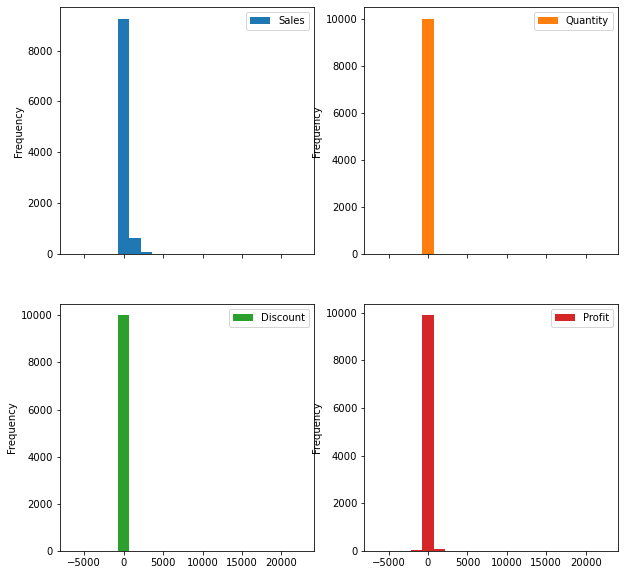

In [10]:
retail_data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

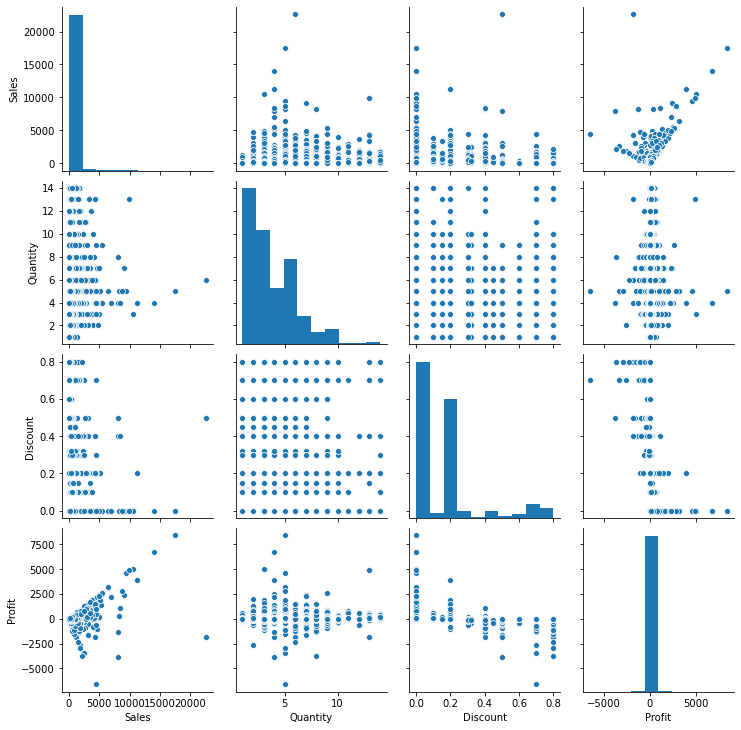

In [11]:
sns.pairplot(retail_data)

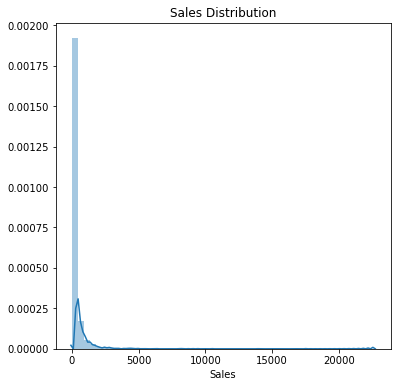

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(retail_data['Sales'])
plt.title('Sales Distribution')
plt.show()

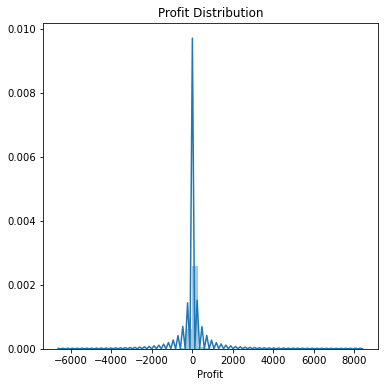

In [13]:

plt.figure(figsize=(6,6))
sns.distplot(retail_data['Profit'])
plt.title('Profit Distribution')
plt.show()

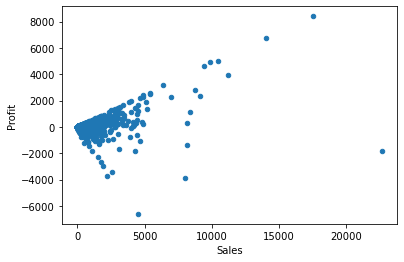

In [14]:
retail_data.plot(x="Sales", y="Profit", kind="scatter")

# Data Visualization

### 1. Shipping Mode Distribution

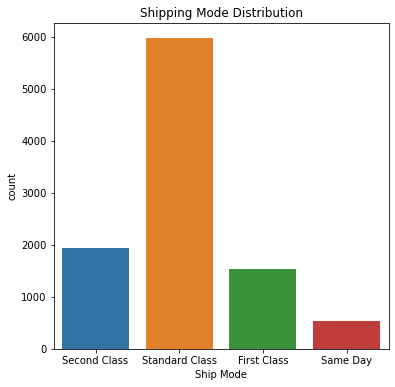

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Ship Mode', data=retail_data)
plt.title('Shipping Mode Distribution')
plt.show()

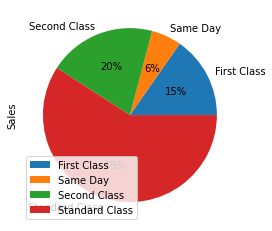

In [16]:
retail_data.groupby(['Ship Mode']).sum().plot(kind='pie', y='Sales', autopct='%1.0f%%')

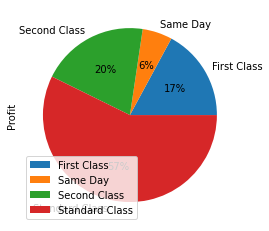

In [17]:
retail_data.groupby(['Ship Mode']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')

#### Inference:
    Shipment mode with highest sales -> Standard Class. With higher sales, we see higher profit.

### 2. Segment Wise Distribution

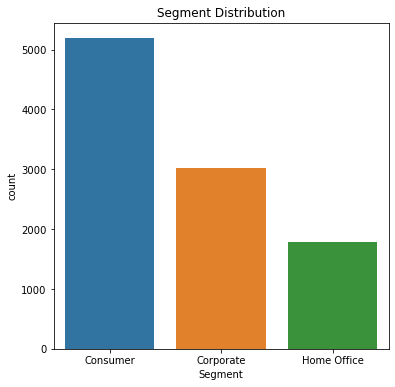

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Segment', data=retail_data)
plt.title('Segment Distribution')
plt.show()

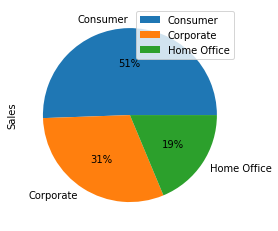

In [19]:
retail_data.groupby(['Segment']).sum().plot(kind='pie', y='Sales', autopct='%1.0f%%')

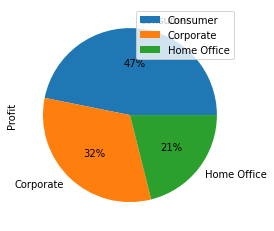

In [20]:
retail_data.groupby(['Segment']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')

#### Segments with highest sales & Profit -> Consumer (Sales: 51%, Profit: 47%)

### 3. Region Wise Distribution

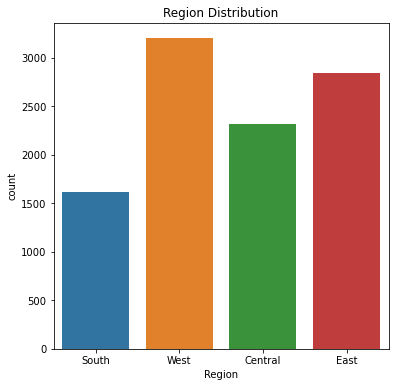

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Region', data=retail_data)
plt.title('Region Distribution')
plt.show()

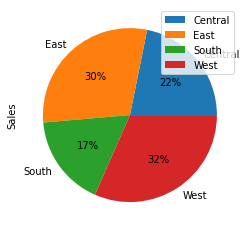

In [22]:
retail_data.groupby(['Region']).sum().plot(kind='pie', y='Sales', autopct='%1.0f%%')

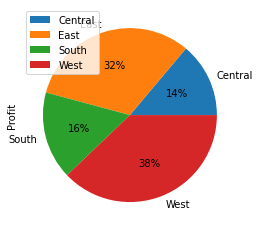

In [23]:
retail_data.groupby(['Region']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')

### Region (Sales, Profit)
* West    (32%, 38%) 
* East    (30%, 32%) 
* Central (22%, 14%)
* South   (17%, 16%)
________
* West & East region have more profits than sales. Vice Versa for Central & South. (We need to find the category and sub-categories being ordered from this region).
* West & East have major records of transactions. South is the region with least no. of transactions.

### 4. Category Wise Distribution

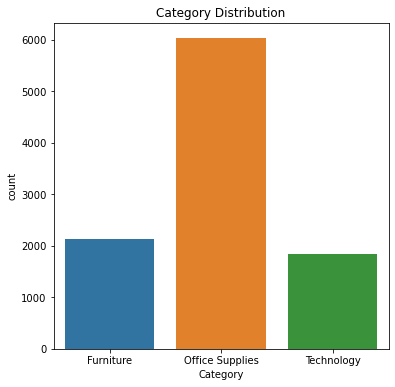

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Category', data=retail_data)
plt.title('Category Distribution')
plt.show()

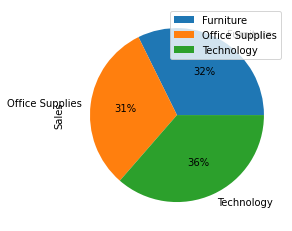

In [25]:
retail_data.groupby(['Category']).sum().plot(kind='pie', y='Sales', autopct='%1.0f%%')

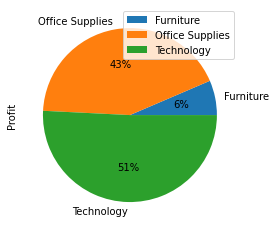

In [26]:
retail_data.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.0f%%')

### Category (Sales, Profit)
* Office Supplies (31%, 43%) - Which Subcategory products are giving higher profits
* Technology      (36%, 51%) - Which Subcategory products are giving higher profits
* Furnitures      (32%, 6%)  - Furniture have lower profit. Which are these region where furnitures are sold?

Maximum transactions were made for Office supplies

    For categories Office Supplies and Technology, we can infer that these are earning more profits than sales.

### 5. SubCategory wise Distribution

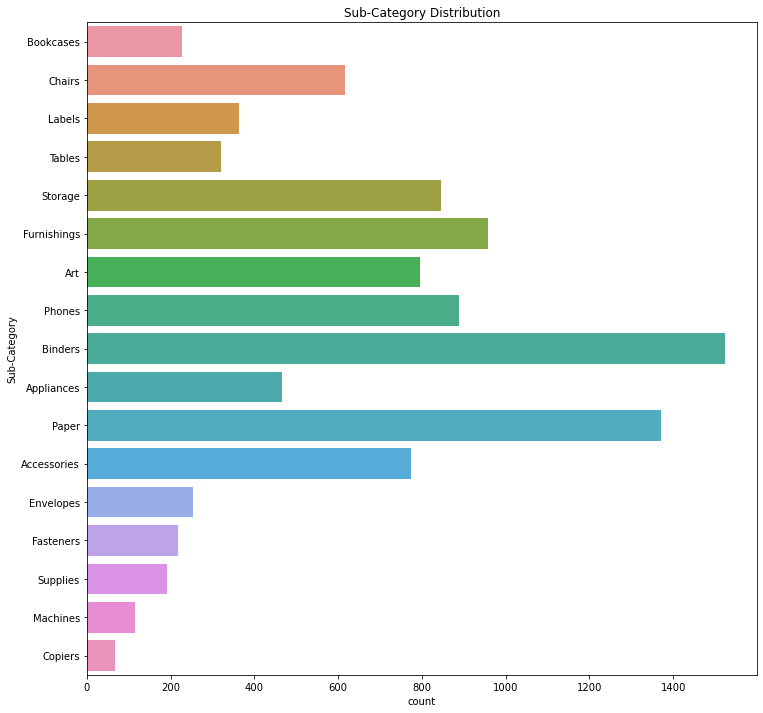

In [27]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(12,12))
sns.countplot(y='Sub-Category', data=retail_data)
plt.title('Sub-Category Distribution')
plt.show()

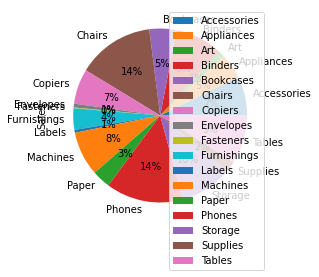

In [28]:
retail_data.groupby(['Sub-Category']).sum().plot(kind='pie', y='Sales', autopct='%1.0f%%')

#### Binders, Papers, Furnishings, etc are some of the leading subcategories.

### 6. State wise Distribution

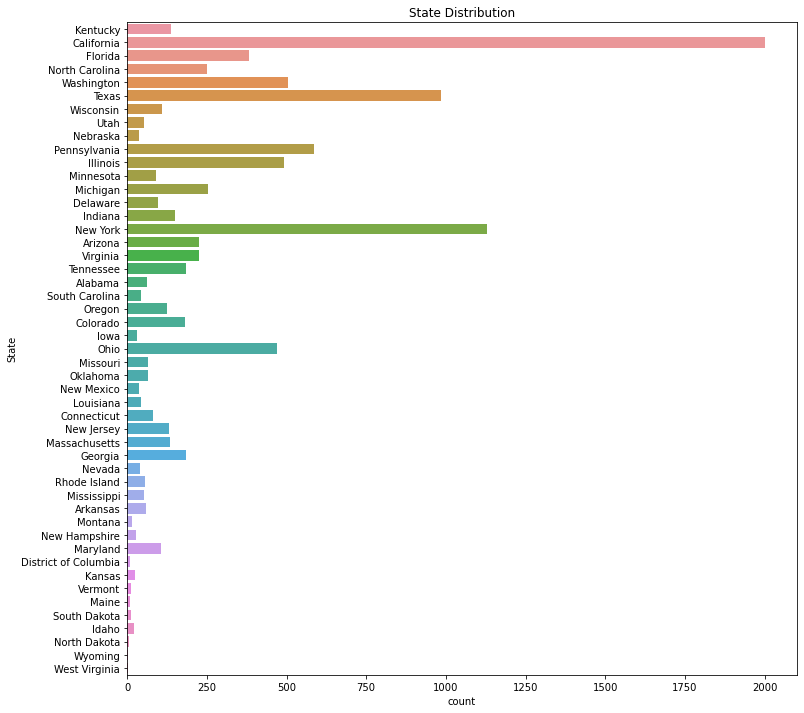

In [29]:
plt.figure(figsize=(12,12))
sns.countplot(y='State', data=retail_data)
plt.title('State Distribution')
plt.show()

##### States: California, New Yor, Texas, Ohio, etc.. are the ones with highest orders/purchases

### 7. City Wise Distribution

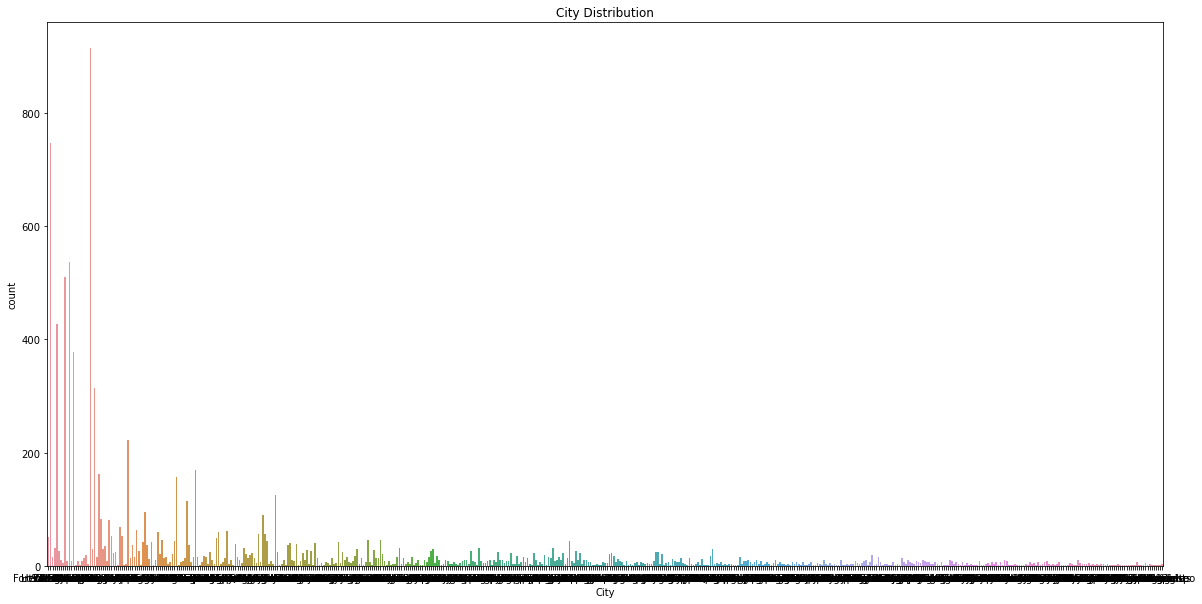

In [30]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(20,10))
sns.countplot(x='City', data=retail_data)
plt.title('City Distribution')
plt.show()

### Let's check the City wise No. of Orders/Purchases in detail:

In [139]:
retail_data['City'].value_counts().head(20)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

### 8. Sub-Category Wise Total Quantity Purchased/Ordered:

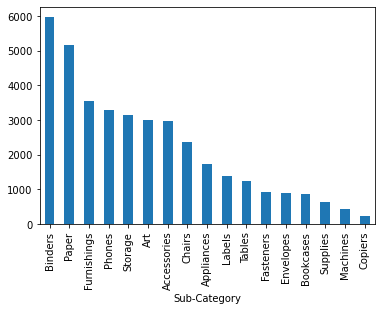

In [32]:
retail_data.groupby('Sub-Category').Quantity.sum().sort_values(ascending=False).plot.bar()

### 9. Segment Wise Total Quantity Purchased/Ordered

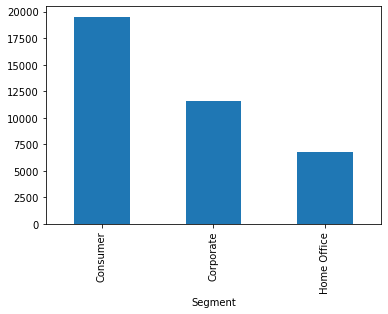

In [33]:
retail_data.groupby('Segment').Quantity.sum().sort_values(ascending=False).plot.bar()

### 10. Region Wise Total Quantity Ordered/Purchased:

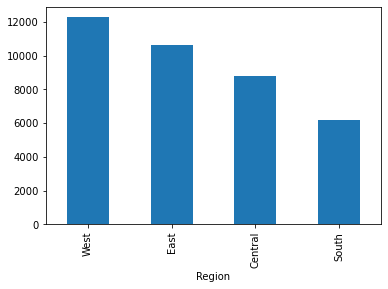

In [34]:
retail_data.groupby('Region').Quantity.sum().sort_values(ascending=False).plot.bar()

### 11. Leading States With Highest Quantity Ordered/Purchased

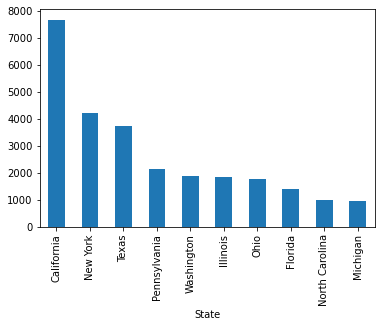

In [35]:
retail_data.groupby('State').Quantity.sum().sort_values(ascending=False)[:10].plot.bar()

### 12.Sub-Categories On which Max. DIscounts were Offered:

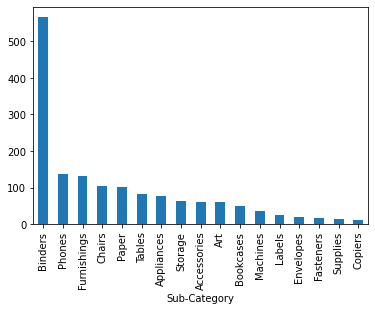

In [141]:
retail_data.groupby('Sub-Category').Discount.sum().sort_values(ascending=False).plot.bar()

### 13. Segments with Max. Discounts Offered:

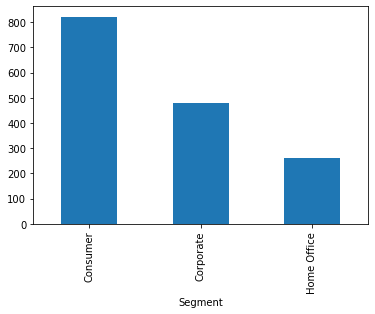

In [37]:
retail_data.groupby('Segment').Discount.sum().sort_values(ascending=False).plot.bar()

### 14. Sub-Category With Highest Profit 

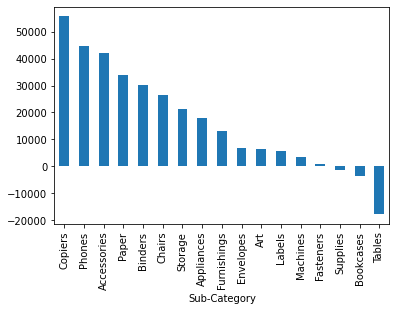

In [38]:
retail_data.groupby('Sub-Category').Profit.sum().sort_values(ascending=False).plot.bar()

### 15. Segment & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Segment with Maximum sales

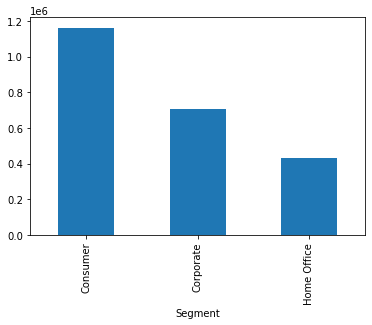

In [39]:
retail_data.groupby('Segment').Sales.sum().sort_values(ascending=False)[:5].plot.bar()

### B. Segment & Category Wise Sales Summary

In [40]:
df_cat_seg_pivot = pd.pivot_table(retail_data,['Sales'],['Segment','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_seg_pivot.reindex(df_cat_seg_pivot.sort_index().index)
df_cat_seg_pivot

Sales
Segment     Category                    
Consumer    Furniture        391049.3120
            Office Supplies  363952.1360
            Technology       406399.8970
Corporate   Furniture        229019.7858
            Office Supplies  230676.4620
            Technology       246450.1190
Home Office Furniture        121930.6975
            Office Supplies  124418.4340
            Technology       183304.0170

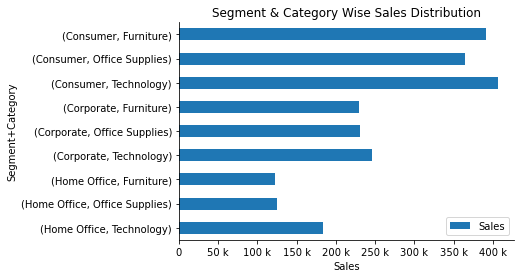

In [41]:
ax = df_cat_seg_pivot.plot(
...     kind='barh', stacked=True,
...     title='Segment & Category Wise Sales Distribution'
... )
>>> ax.invert_yaxis() 
>>> ax.set(xlabel='Sales', ylabel='Segment+Category')


>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())

>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### C. Segment with Maximum Profit

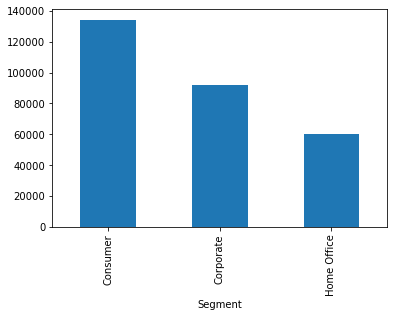

In [42]:
retail_data.groupby('Segment').Profit.sum().sort_values(ascending=False)[:5].plot.bar()

### D. Segment & category Wise Profit DIstribution

In [43]:
df_cat_seg_pro_pivot = pd.pivot_table(retail_data,['Profit'],['Segment','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_seg_pro_pivot.reindex(df_cat_seg_pro_pivot.sort_index().index)
df_cat_seg_pro_pivot

Profit
Segment     Category                   
Consumer    Furniture         6991.0786
            Office Supplies  56330.3210
            Technology       70797.8096
Corporate   Furniture         7584.8158
            Office Supplies  40227.3202
            Technology       44166.9980
Home Office Furniture         3875.3784
            Office Supplies  25933.1596
            Technology       30490.1405

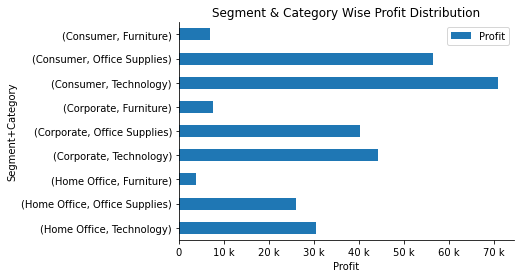

In [44]:
ax = df_cat_seg_pro_pivot.plot(
...     kind='barh', stacked=True,
...     title='Segment & Category Wise Profit Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Profit', ylabel='Segment+Category')

# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### E. Segment With Maximum Discount

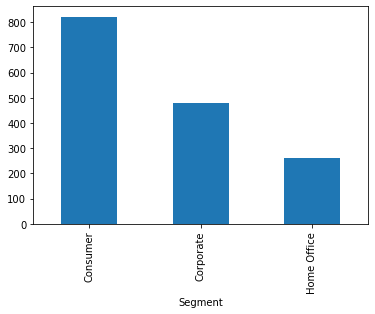

In [45]:
retail_data.groupby('Segment').Discount.sum().sort_values(ascending=False)[:5].plot.bar()

### F. Segment & category Wise Discount Distribution

In [46]:
df_cat_seg_dsc_pivot = pd.pivot_table(retail_data,['Discount'],['Segment','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_seg_dsc_pivot.reindex(df_cat_seg_dsc_pivot.sort_index().index)
df_cat_seg_dsc_pivot

Discount
Segment     Category                 
Consumer    Furniture          196.71
            Office Supplies    496.40
            Technology         127.80
Corporate   Furniture          112.45
            Office Supplies    292.30
            Technology          73.10
Home Office Furniture           59.73
            Office Supplies    159.10
            Technology          43.50

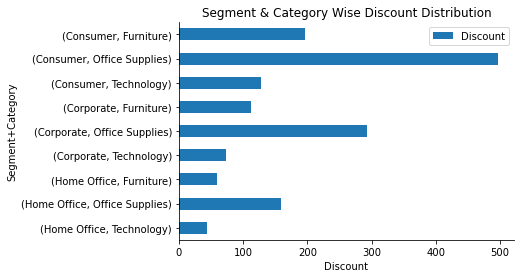

In [47]:
ax = df_cat_seg_dsc_pivot.plot(
...     kind='barh', stacked=True,
...     title='Segment & Category Wise Discount Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Discount', ylabel='Segment+Category')

# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### G. Segment With Maximum Quantity Ordered/Purchased

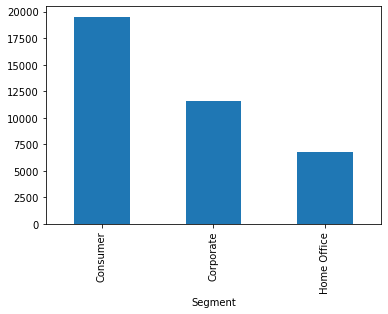

In [48]:
retail_data.groupby('Segment').Quantity.sum().sort_values(ascending=False)[:5].plot.bar()

### H. Segment & category Wise Quantity Distribution

In [49]:
df_cat_seg_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['Segment','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_seg_qty_pivot.reindex(df_cat_seg_qty_pivot.sort_index().index)
df_cat_seg_qty_pivot

Quantity
Segment     Category                 
Consumer    Furniture            4166
            Office Supplies     11758
            Technology           3597
Corporate   Furniture            2495
            Office Supplies      7018
            Technology           2095
Home Office Furniture            1367
            Office Supplies      4130
            Technology           1247

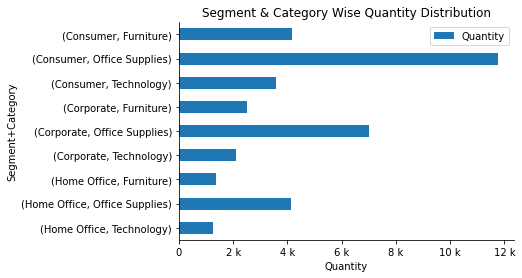

In [50]:
ax = df_cat_seg_qty_pivot.plot(
...     kind='barh', stacked=True,
...     title='Segment & Category Wise Quantity Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Quantity', ylabel='Segment+Category')

# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

____________________________________________________

### 16. Category & Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Categories With maximum sales

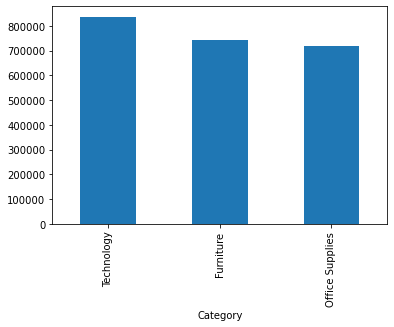

In [51]:
retail_data.groupby('Category').Sales.sum().sort_values(ascending=False)[:].plot.bar()

Category wise Sales:
* Furniture: 741999.79
* Office Supplies: 719047.032
* Technology: 836154.033

### B. Category & Sub-Category wise Sales Summary

In [52]:
df_cat_subcat_pivot = pd.pivot_table(retail_data,['Sales'],['Category','Sub-Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_subcat_pivot.reindex(df_cat_subcat_pivot['Sales'].sort_values(ascending=False).index)
df_cat_subcat_pivot

Sales
Category        Sub-Category             
Furniture       Bookcases     114879.9963
                Chairs        328449.1030
                Furnishings    91705.1640
                Tables        206965.5320
Office Supplies Appliances    107532.1610
                Art            27118.7920
                Binders       203412.7330
                Envelopes      16476.4020
                Fasteners       3024.2800
                Labels         12486.3120
                Paper          78479.2060
                Storage       223843.6080
                Supplies       46673.5380
Technology      Accessories   167380.3180
                Copiers       149528.0300
                Machines      189238.6310
                Phones        330007.0540

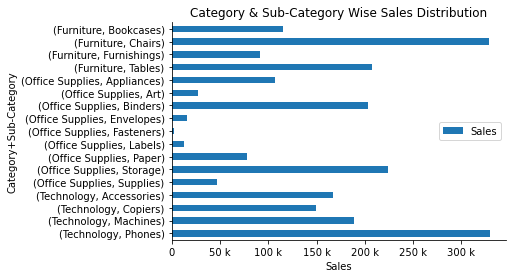

In [53]:
ax = df_cat_subcat_pivot.plot(
...     kind='barh', stacked=True,
...     title='Category & Sub-Category Wise Sales Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Sales', ylabel='Category+Sub-Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### C. Categories With maximum profit

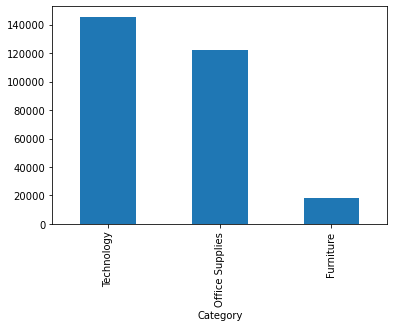

In [54]:
retail_data.groupby('Category').Profit.sum().sort_values(ascending=False)[:].plot.bar()

Category wise Profit:
* Furniture: 18451.2728
* Office Supplies: 122490.8008 
* Technology: 145454.9481

### D. Category & Sub-Category wise Profit Summary

In [55]:
df_cat_subcat_pro_pivot2 = pd.pivot_table(retail_data,['Profit'],['Category','Sub-Category'], aggfunc=np.sum)
df_cat_subcat_pro_pivot2.reindex(df_cat_subcat_pro_pivot2.sort_index().index)
df_cat_subcat_pro_pivot2

Profit
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Chairs        26590.1663
                Furnishings   13059.1436
                Tables       -17725.4811
Office Supplies Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Envelopes      6964.1767
                Fasteners       949.5182
                Labels         5546.2540
                Paper         34053.5693
                Storage       21278.8264
                Supplies      -1189.0995
Technology      Accessories   41936.6357
                Copiers       55617.8249
                Machines       3384.7569
                Phones        44515.7306

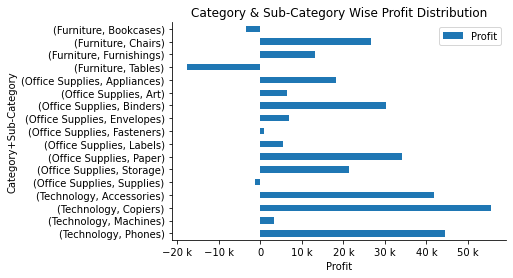

In [56]:
ax = df_cat_subcat_pro_pivot2.plot(
...     kind='barh', stacked=True,
...     title='Category & Sub-Category Wise Profit Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Profit', ylabel='Category+Sub-Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

Category wise Profit:
* Furniture: 18451.2728
* Office Supplies: 122490.8008 
* Technology: 145454.9481
__________________

* Tables and Bookcases under Furniture category incurred losses.
* Supplies under Office Supplies incurred losses.

### E.  Categories with Maximum Discounts Offered

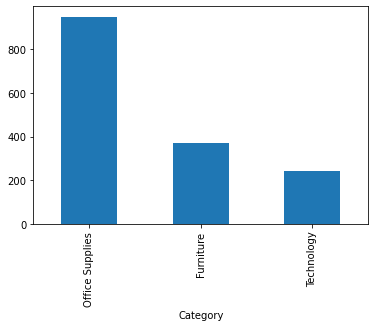

In [57]:
retail_data.groupby('Category').Discount.sum().sort_values(ascending=False)[:].plot.bar()

### F. Category & Sub-category Wise Discount Distribution

In [58]:
df_cat_subcat_dsc_pivot2 = pd.pivot_table(retail_data,['Discount'],['Category','Sub-Category'], aggfunc=np.sum)
df_cat_subcat_dsc_pivot2.reindex(df_cat_subcat_dsc_pivot2.sort_index().index)
df_cat_subcat_dsc_pivot2

Discount
Category        Sub-Category          
Furniture       Bookcases        48.14
                Chairs          105.00
                Furnishings     132.40
                Tables           83.35
Office Supplies Appliances       77.60
                Art              59.60
                Binders         567.00
                Envelopes        20.40
                Fasteners        17.80
                Labels           25.00
                Paper           102.60
                Storage          63.20
                Supplies         14.60
Technology      Accessories      60.80
                Copiers          11.00
                Machines         35.20
                Phones          137.40

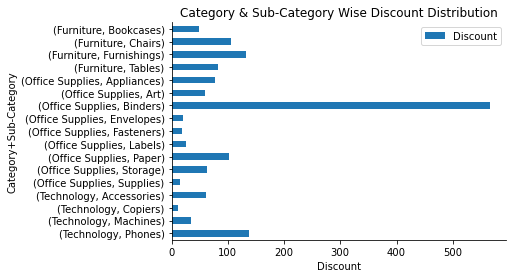

In [59]:
ax = df_cat_subcat_dsc_pivot2.plot(
...     kind='barh', stacked=True,
...     title='Category & Sub-Category Wise Discount Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Discount', ylabel='Category+Sub-Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### G. Categories with Maximum Quantity Ordered/Purchased

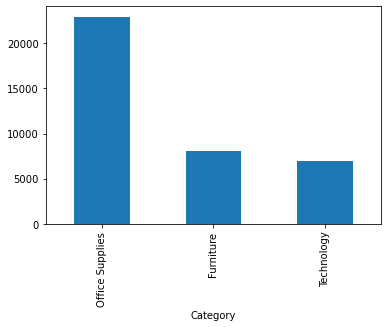

In [60]:
retail_data.groupby('Category').Quantity.sum().sort_values(ascending=False)[:].plot.bar()

### H. Category & Sub-category Wise Quantity Distribution

In [61]:
df_cat_subcat_qty_pivot2 = pd.pivot_table(retail_data,['Quantity'],['Category','Sub-Category'], aggfunc=np.sum)
df_cat_subcat_qty_pivot2.reindex(df_cat_subcat_qty_pivot2.sort_index().index)
df_cat_subcat_qty_pivot2

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

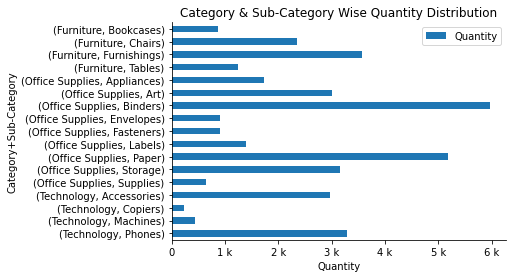

In [62]:
ax = df_cat_subcat_qty_pivot2.plot(
...     kind='barh', stacked=True,
...     title='Category & Sub-Category Wise Quantity Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Quantity', ylabel='Category+Sub-Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

Major selling product across categories:
* Furniture: Furnishings, Chairs
* Office Supplies: Binders, Papers, Storage, Art
* Technology: Phones, Accessories

_________________________________________

### 17. Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Sub-Categories With maximum sales

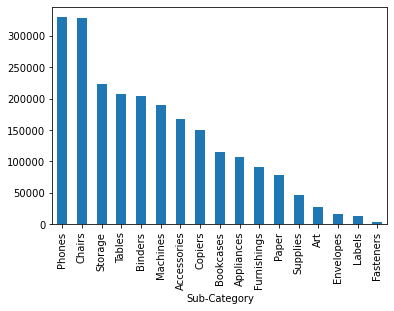

In [63]:
retail_data.groupby('Sub-Category').Sales.sum().sort_values(ascending=False)[:].plot.bar()

### B. Sub-Categories With maximum profit

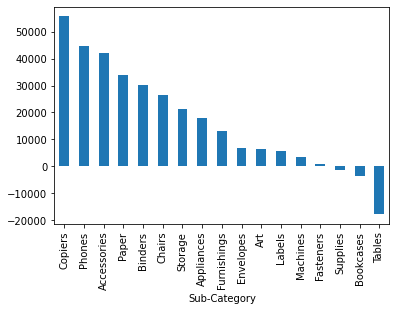

In [64]:
retail_data.groupby('Sub-Category').Profit.sum().sort_values(ascending=False)[:].plot.bar()

### C. Sub-Categories With maximum Discount

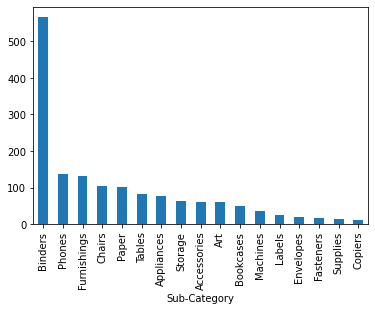

In [65]:
retail_data.groupby('Sub-Category').Discount.sum().sort_values(ascending=False)[:].plot.bar()

### D. Sub-Categories With maximum Quantity

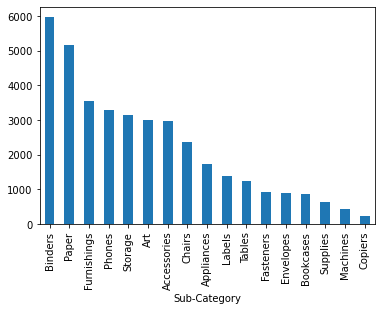

In [66]:
retail_data.groupby('Sub-Category').Quantity.sum().sort_values(ascending=False)[:].plot.bar()

### 18. Region & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Region With maximum sales

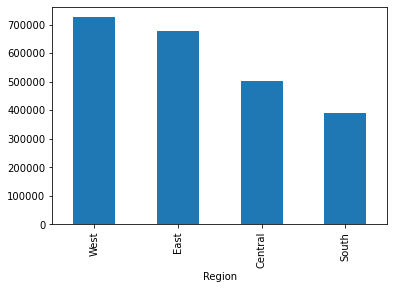

In [67]:
retail_data.groupby('Region').Sales.sum().sort_values(ascending=False)[:5].plot.bar()

Region wise Sales:
* Central: 501239.8908
* East: 678781.24
* West: 725457.8245
* South: 391721.905

### B. Region & Category Wise Sales Distribution

In [68]:
df_reg_cat_pivot = pd.pivot_table(retail_data,['Sales'],['Region','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_reg_cat_pivot.reindex(df_reg_cat_pivot.sort_index().index)
df_reg_cat_pivot

Sales
Region  Category                    
Central Furniture        163797.1638
        Office Supplies  167026.4150
        Technology       170416.3120
East    Furniture        208291.2040
        Office Supplies  205516.0550
        Technology       264973.9810
South   Furniture        117298.6840
        Office Supplies  125651.3130
        Technology       148771.9080
West    Furniture        252612.7435
        Office Supplies  220853.2490
        Technology       251991.8320

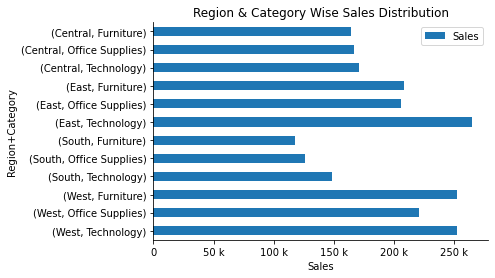

In [69]:
ax = df_reg_cat_pivot.plot(
...     kind='barh', stacked=True,
...     title='Region & Category Wise Sales Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Sales', ylabel='Region+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### C. Region With maximum profit

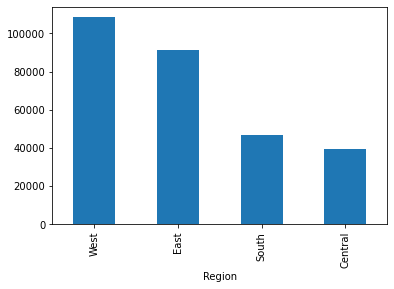

In [70]:
retail_data.groupby('Region').Profit.sum().sort_values(ascending=False)[:5].plot.bar()

Region wise Profit:
* Central: 39706.3625
* East: 91522.78
* South: 46749.4303
* West: 108418.4489

Max. profit earned from Region: West
* In Central region only, in the furniture category, we can see some losses incurred.
* In cental region, Max. profit was seen in Technology category
* In East region, Max. profit was seen in Technology category and Office Supplies category.
* In South region as well, we can see major profits gained in Office Supplies & Technology category.
* In west region, We can see max profit was gained in Technology category and Office supplies categories.

### D. Region & Category Wise Profit Distribution

In [71]:
df_reg_cat_pro_pivot = pd.pivot_table(retail_data,['Profit'],['Region','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_reg_cat_pro_pivot.reindex(df_reg_cat_pro_pivot.sort_index().index)
df_reg_cat_pro_pivot

Profit
Region  Category                   
Central Furniture        -2871.0494
        Office Supplies   8879.9799
        Technology       33697.4320
East    Furniture         3046.1658
        Office Supplies  41014.5791
        Technology       47462.0351
South   Furniture         6771.2061
        Office Supplies  19986.3928
        Technology       19991.8314
West    Furniture        11504.9503
        Office Supplies  52609.8490
        Technology       44303.6496

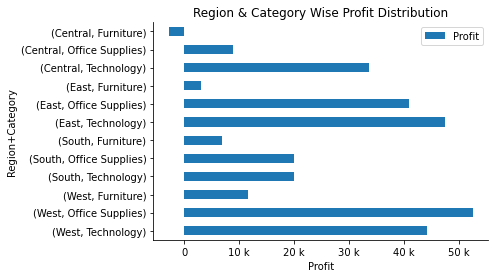

In [72]:
ax = df_reg_cat_pro_pivot.plot(
...     kind='barh', stacked=True,
...     title='Region & Category Wise Profit Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Profit', ylabel='Region+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### E. Regions with Maximum Discounts Offered

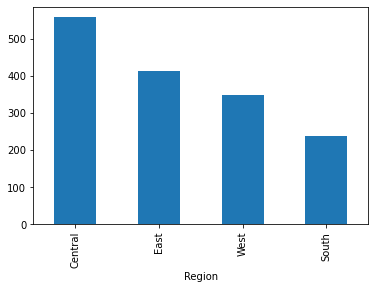

In [73]:
retail_data.groupby('Region').Discount.sum().sort_values(ascending=False)[:5].plot.bar()

### F. Region & Category Wise Discount Distribution

In [74]:
df_reg_cat_dsc_pivot1 = pd.pivot_table(retail_data,['Discount'],['Region','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_reg_cat_dsc_pivot1.reindex(df_reg_cat_dsc_pivot1.sort_index().index)
df_reg_cat_dsc_pivot1

Discount
Region  Category                 
Central Furniture          143.04
        Office Supplies    359.40
        Technology          55.90
East    Furniture           92.60
        Office Supplies    244.70
        Technology          76.70
South   Furniture           40.35
        Office Supplies    166.60
        Technology          31.60
West    Furniture           92.90
        Office Supplies    177.10
        Technology          80.20

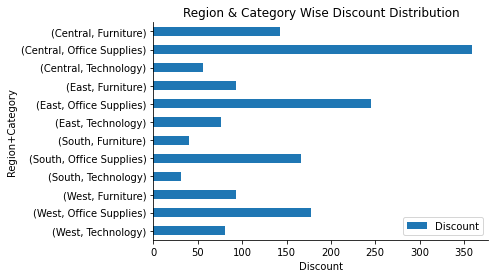

In [75]:
ax = df_reg_cat_dsc_pivot1.plot(
...     kind='barh', stacked=True,
...     title='Region & Category Wise Discount Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Discount', ylabel='Region+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### G. Region With Maximum Quantity Ordered/Purchased

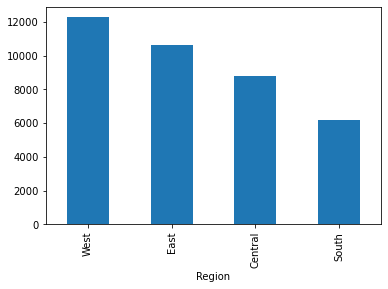

In [76]:
retail_data.groupby('Region').Quantity.sum().sort_values(ascending=False)[:5].plot.bar()

### H. Region & Category Wise Quantity Distribution

In [77]:
df_reg_cat_qty_pivot1 = pd.pivot_table(retail_data,['Quantity'],['Region','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_reg_cat_qty_pivot1.reindex(df_reg_cat_qty_pivot1.sort_index().index)
df_reg_cat_qty_pivot1

Quantity
Region  Category                 
Central Furniture            1827
        Office Supplies      5409
        Technology           1544
East    Furniture            2214
        Office Supplies      6462
        Technology           1942
South   Furniture            1291
        Office Supplies      3800
        Technology           1118
West    Furniture            2696
        Office Supplies      7235
        Technology           2335

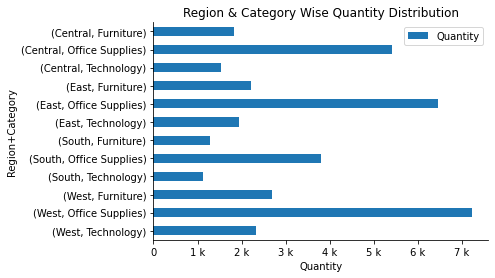

In [78]:
ax = df_reg_cat_qty_pivot1.plot(
...     kind='barh', stacked=True,
...     title='Region & Category Wise Quantity Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Quantity', ylabel='Region+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

* Furniture: West Region had maximum sales of products
* Office Supplies: West Region had maximum sales of office supplies category product
* Technology: East region had maximum sales of this category product

### To find Category performing well for  which all regions?

In [79]:
df_cat_reg_pivot = pd.pivot_table(retail_data,['Sales'],['Category','Region'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_reg_pivot.reindex(df_cat_reg_pivot['Sales'].sort_values(ascending=False).index)
df_cat_reg_pivot

Sales
Category        Region              
Furniture       Central  163797.1638
                East     208291.2040
                South    117298.6840
                West     252612.7435
Office Supplies Central  167026.4150
                East     205516.0550
                South    125651.3130
                West     220853.2490
Technology      Central  170416.3120
                East     264973.9810
                South    148771.9080
                West     251991.8320

* Furniture: West Region had maximum sales of products
* Office Supplies: West Region had maximum sales of office supplies category product
* Technology: East region had maximum sales of this category product

### 19. To find the best performing regions in terms of sales of sub-category products

In [80]:
df_subcat_reg_pivot = pd.pivot_table(retail_data,['Sales'],['Sub-Category','Region'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_subcat_reg_pivot.reindex(df_subcat_reg_pivot['Sales'].sort_values(ascending=False).index)

Sales
Sub-Category Region             
Chairs       West     101781.328
Phones       East     100614.982
             West      98684.352
Chairs       East      96260.683
             Central   85230.646
...                          ...
Labels       South      2353.180
Fasteners    West        923.216
             East        819.718
             Central     778.030
             South       503.316

[68 rows x 1 columns]

In [81]:
df_subcat_reg_pivot.head(50)

Sales
Sub-Category Region              
Accessories  Central   33956.0760
             East      45033.3720
             South     27276.7540
             West      61114.1160
Appliances   Central   23582.0330
             East      34188.4660
             South     19525.3260
             West      30236.3360
Art          Central    5765.3400
             East       7485.7640
             South      4655.6220
             West       9212.0660
Binders      Central   56923.2820
             East      53497.9970
             South     37030.3410
             West      55961.1130
Bookcases    Central   24157.1768
             East      43819.3340
             South     10899.3620
             West      36004.1235
Chairs       Central   85230.6460
             East      96260.6830
             South     45176.4460
             West     101781.3280
Copiers      Central   37259.5700
             East      53219.4620
             South      9299.7560
             West      49749.2420
Envelopes    Central    4636.8720
             East       4375.8740
             South      3345.5560
             West       4118.1000
Fasteners    Central     778.0300
             East        819.7180
             South       503.3160
             West        923.2160
Furnishings  Central   15254.3700
             East      29071.3800
             South     17306.6840
             West      30072.7300
Labels       Central    2451.4720
             East       2602.9340
             South      2353.1800
             West       5078.7260
Machines     Central   26797.3840
             East      66106.1650
             South     53890.9600
             West      42444.1220
Paper        Central   17491.9020
             East      20172.6020

##### Highest Sales in each region in each Sub-Categories:

* Accessories: West
* Appliances: East
* Art: West
* Binders: Central
* Bookcases: East
* Chairs: West
* Copies: East
* Envelopes: Central
* Fasteners: West
* Furnishings: West
* Labels: West
* Machines: East
* Paper: West
* Phones: East
* Storages: East
* Supplies: West
* Tables: West

In [82]:
df_subcat_reg_pivot.tail(20)

Sales
Sub-Category Region             
Paper        Central   17491.902
             East      20172.602
             South     14150.984
             West      26663.718
Phones       Central   72403.282
             East     100614.982
             South     58304.438
             West      98684.352
Storage      Central   45930.112
             East      71612.584
             South     35768.060
             West      70532.852
Supplies     Central    9467.372
             East      10760.116
             South      8318.928
             West      18127.122
Tables       Central   39154.971
             East      39139.807
             South     43916.192
             West      84754.562

### 20. State & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. States with maximum sales

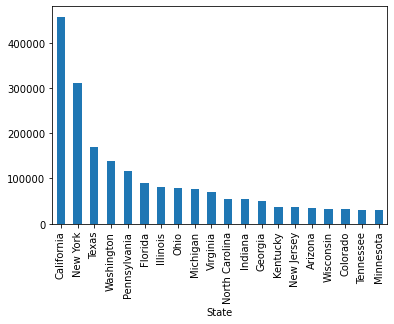

In [83]:
retail_data.groupby('State').Sales.sum().sort_values(ascending=False)[:20].plot.bar()

### B. State & Category Wise Sales Distribution

In [84]:
df_state_cat_sal_pivot = pd.pivot_table(retail_data,['Sales'],['State','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_cat_sal_pivot.reindex(df_state_cat_sal_pivot['Sales'].sort_values(ascending=False).index)
df_state_cat_sal_pivot

Sales
State         Category                  
Alabama       Furniture         6332.480
              Office Supplies   4209.080
              Technology        8969.080
Arizona       Furniture        13525.291
              Office Supplies  10005.825
...                                  ...
West Virginia Office Supplies    536.480
Wisconsin     Furniture        17256.610
              Office Supplies   6059.840
              Technology        8798.160
Wyoming       Furniture         1603.136

[142 rows x 1 columns]

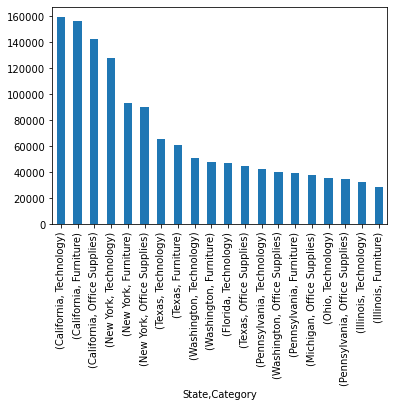

In [85]:
df_state_cat_sal_pivot.groupby(['State','Category']).Sales.sum().sort_values(ascending=False)[:20].plot.bar()

### C. 10 States with minimum sales

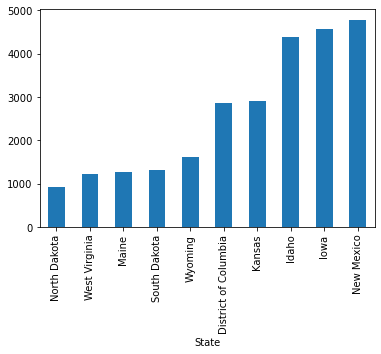

In [86]:
retail_data.groupby('State').Sales.sum().sort_values(ascending=True)[:10].plot.bar()

### D. Top 10 States with maximum profit gained

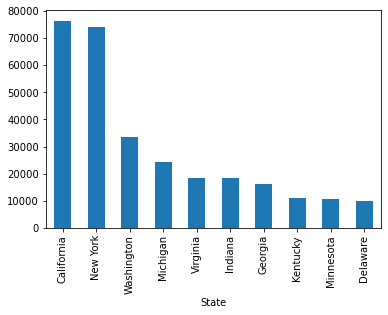

In [87]:
retail_data.groupby('State').Profit.sum().sort_values(ascending=False)[:10].plot.bar()

### E. State & Category Wise Profit Distribution

In [88]:
df_state_cat_pro_pivot = pd.pivot_table(retail_data,['Profit'],['State','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_cat_pro_pivot.reindex(df_state_cat_pro_pivot['Profit'].sort_values(ascending=False).index)
df_state_cat_pro_pivot

Profit
State         Category                  
Alabama       Furniture        1231.3882
              Office Supplies  1257.6342
              Technology       3297.8029
Arizona       Furniture       -2744.9228
              Office Supplies  -795.5030
...                                  ...
West Virginia Office Supplies   262.8752
Wisconsin     Furniture        3838.9545
              Office Supplies  1965.7762
              Technology       2597.0697
Wyoming       Furniture         100.1960

[142 rows x 1 columns]

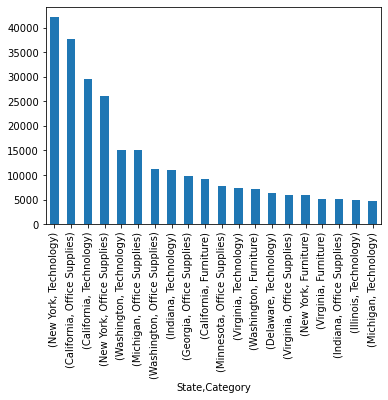

In [89]:
df_state_cat_pro_pivot.groupby(['State','Category']).Profit.sum().sort_values(ascending=False)[:20].plot.bar()

### F. States that offered maximum Discounts

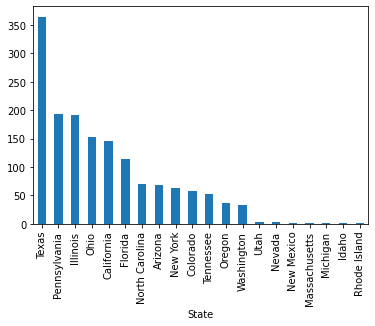

In [90]:
retail_data.groupby('State').Discount.sum().sort_values(ascending=False)[:20].plot.bar()

### G. State & category wise Discount Distribution

In [91]:
df_state_cat_dsc_pivot = pd.pivot_table(retail_data,['Discount'],['State','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_cat_dsc_pivot.reindex(df_state_cat_dsc_pivot['Discount'].sort_values(ascending=False).index)
df_state_cat_dsc_pivot

Discount
State         Category                 
Alabama       Furniture             0.0
              Office Supplies       0.0
              Technology            0.0
Arizona       Furniture            14.0
              Office Supplies      42.9
...                                 ...
West Virginia Office Supplies       0.0
Wisconsin     Furniture             0.0
              Office Supplies       0.0
              Technology            0.0
Wyoming       Furniture             0.2

[142 rows x 1 columns]

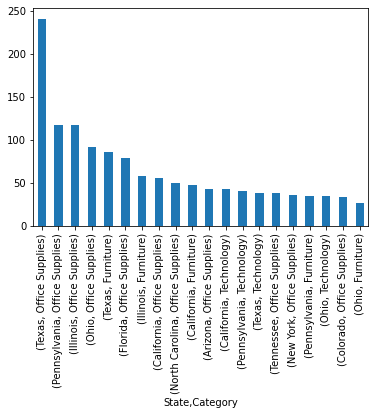

In [92]:
df_state_cat_dsc_pivot.groupby(['State','Category']).Discount.sum().sort_values(ascending=False)[:20].plot.bar()

### H. State with Maximum Quantity Ordered/Purchased

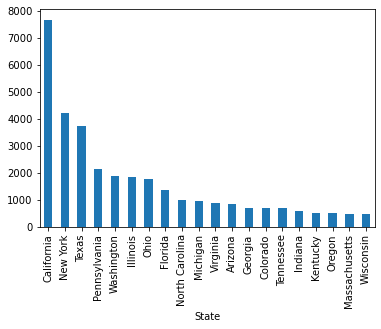

In [93]:
retail_data.groupby('State').Quantity.sum().sort_values(ascending=False)[:20].plot.bar()

### I. State & Category Wise Quantity Distribution


In [94]:
df_state_cat_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['State','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_cat_qty_pivot.reindex(df_state_cat_qty_pivot['Quantity'].sort_values(ascending=False).index)
df_state_cat_qty_pivot

Quantity
State         Category                 
Alabama       Furniture              54
              Office Supplies       149
              Technology             53
Arizona       Furniture             188
              Office Supplies       501
...                                 ...
West Virginia Office Supplies        15
Wisconsin     Furniture             144
              Office Supplies       215
              Technology            104
Wyoming       Furniture               4

[142 rows x 1 columns]

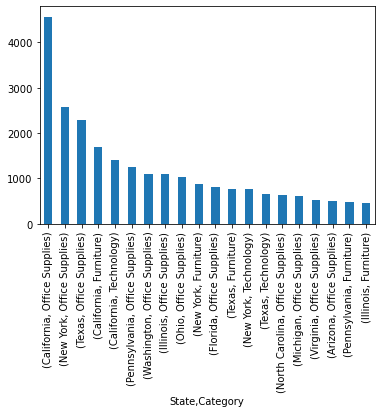

In [95]:
df_state_cat_qty_pivot.groupby(['State','Category']).Quantity.sum().sort_values(ascending=False)[:20].plot.bar()

### 21. State & Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. States with highest Sub-category sales (Top 10):

In [96]:
df_state_subcatpivot = pd.pivot_table(retail_data,['Sales'],['Sub-Category','State'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_subcatpivot.reindex(df_state_subcatpivot['Sales'].sort_values(ascending=False).index)
df_state_subcatpivot

Sales
Sub-Category State                   
Accessories  Alabama         2322.830
             Arizona         3396.160
             Arkansas        1788.440
             California     37255.010
             Colorado        2287.992
...                               ...
Tables       Utah            1957.380
             Virginia       14042.470
             Washington     25062.320
             West Virginia    673.344
             Wisconsin        867.660

[656 rows x 1 columns]

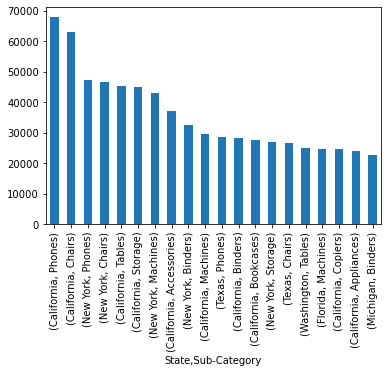

In [97]:
df_state_subcatpivot.groupby(['State','Sub-Category']).Sales.sum().sort_values(ascending=False)[:20].plot.bar()

### B. States with lowest Sub-category sales (Last 10):

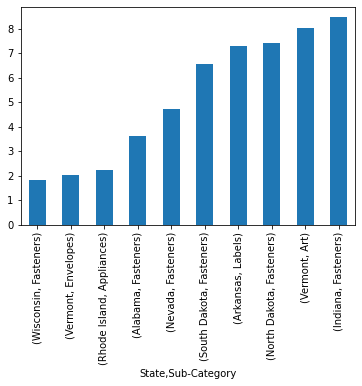

In [98]:
df_state_subcatpivot.groupby(['State','Sub-Category']).Sales.sum().sort_values(ascending=True)[:10].plot.bar()

### C. State wise Sub-Category Profit distribution (Top 10):


In [99]:
df_state_subcat_pro_pivot = pd.pivot_table(retail_data,['Profit'],['State','Sub-Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_subcat_pro_pivot.reindex(df_state_subcat_pro_pivot['Profit'].sort_values(ascending=False).index)
df_state_subcat_pro_pivot

Profit
State     Sub-Category           
Alabama   Accessories    816.4346
          Appliances      56.2032
          Art             88.5344
          Binders        227.7688
          Chairs         660.9664
...                           ...
Wisconsin Phones        1095.8977
          Storage        105.3917
          Supplies         5.8887
          Tables         147.5022
Wyoming   Chairs         100.1960

[656 rows x 1 columns]

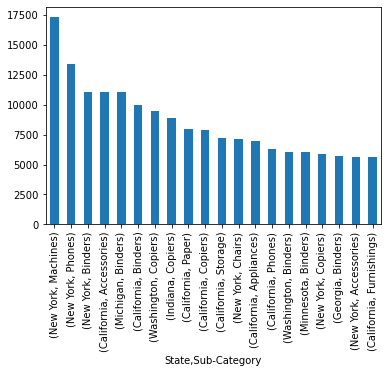

In [100]:
df_state_subcat_pro_pivot.groupby(['State','Sub-Category']).Profit.sum().sort_values(ascending=False)[:20].plot.bar()

### D. State - SubCategory with Minimum Profit/ Max. Losses incurred:

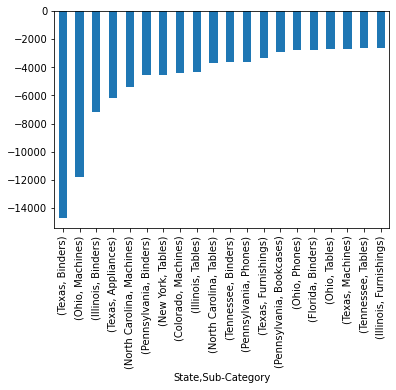

In [101]:
df_state_subcat_pro_pivot.groupby(['State','Sub-Category']).Profit.sum().sort_values(ascending=True)[:20].plot.bar()

### E. States wise Sub-category Discounts Distribution

In [102]:
df_state_subcat_dsc_pivot = pd.pivot_table(retail_data,['Discount'],['State','Sub-Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_subcat_dsc_pivot.reindex(df_state_subcat_dsc_pivot['Discount'].sort_values(ascending=False).index)
df_state_subcat_dsc_pivot

Discount
State     Sub-Category          
Alabama   Accessories        0.0
          Appliances         0.0
          Art                0.0
          Binders            0.0
          Chairs             0.0
...                          ...
Wisconsin Phones             0.0
          Storage            0.0
          Supplies           0.0
          Tables             0.0
Wyoming   Chairs             0.2

[656 rows x 1 columns]

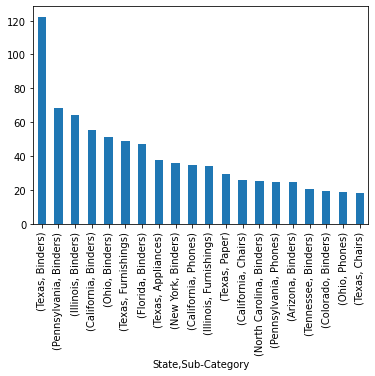

In [103]:
df_state_subcat_dsc_pivot.groupby(['State','Sub-Category']).Discount.sum().sort_values(ascending=False)[:20].plot.bar()

### F. States wise Sub-category Quantity Distribution

In [104]:
df_state_subcat_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['State','Sub-Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_state_subcat_qty_pivot.reindex(df_state_subcat_qty_pivot['Quantity'].sort_values(ascending=False).index)
df_state_subcat_qty_pivot

Quantity
State     Sub-Category          
Alabama   Accessories         24
          Appliances           1
          Art                 38
          Binders             41
          Chairs              30
...                          ...
Wisconsin Phones              40
          Storage             30
          Supplies             3
          Tables               6
Wyoming   Chairs               4

[656 rows x 1 columns]

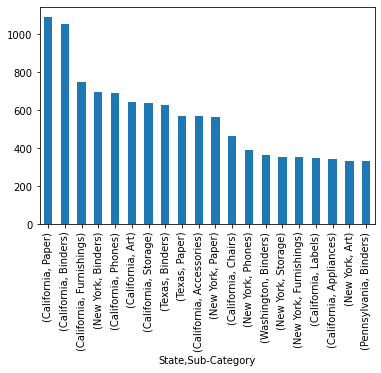

In [105]:
df_state_subcat_qty_pivot.groupby(['State','Sub-Category']).Quantity.sum().sort_values(ascending=False)[:20].plot.bar()

### A.Ship Mode wise Category sales Distribution

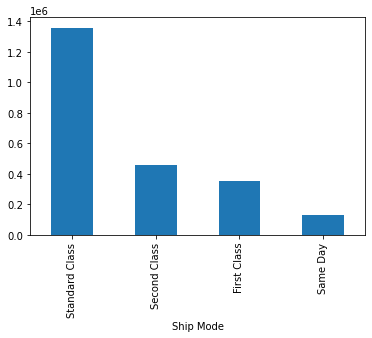

In [106]:
retail_data.groupby('Ship Mode').Sales.sum().sort_values(ascending=False)[:].plot.bar()

In [107]:
df_ship_cat_sal_pivot = pd.pivot_table(retail_data,['Sales'],['Ship Mode','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_ship_cat_sal_pivot.reindex(df_ship_cat_sal_pivot.sort_index().index)
df_ship_cat_sal_pivot

Sales
Ship Mode      Category                    
First Class    Furniture        110730.5229
               Office Supplies  101332.3090
               Technology       139365.5910
Same Day       Furniture         39148.7790
               Office Supplies   29090.4810
               Technology        60123.8650
Second Class   Furniture        156289.0244
               Office Supplies  160683.0030
               Technology       142221.5420
Standard Class Furniture        435831.4690
               Office Supplies  427941.2390
               Technology       494443.0350

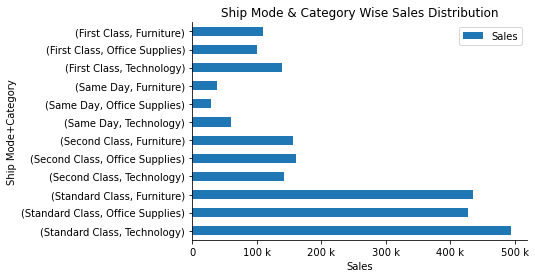

In [108]:
ax = df_ship_cat_sal_pivot.plot(
...     kind='barh', stacked=True,
...     title='Ship Mode & Category Wise Sales Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Sales', ylabel='Ship Mode+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### B.Ship Mode wise Category Profit Distribution 

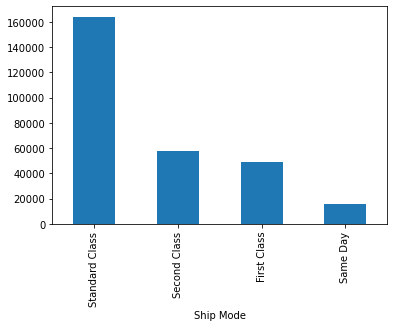

In [109]:
retail_data.groupby('Ship Mode').Profit.sum().sort_values(ascending=False)[:].plot.bar()

In [110]:
df_ship_cat_pro_pivot = pd.pivot_table(retail_data,['Profit'],['Ship Mode','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_ship_cat_pro_pivot.reindex(df_ship_cat_pro_pivot.sort_index().index)
df_ship_cat_pro_pivot

Profit
Ship Mode      Category                   
First Class    Furniture         3066.9474
               Office Supplies  18400.3291
               Technology       27502.5634
Same Day       Furniture          797.3484
               Office Supplies   6423.5192
               Technology        8670.8913
Second Class   Furniture         4226.2614
               Office Supplies  27068.1676
               Technology       26152.2064
Standard Class Furniture        10360.7156
               Office Supplies  70598.7849
               Technology       83129.2870

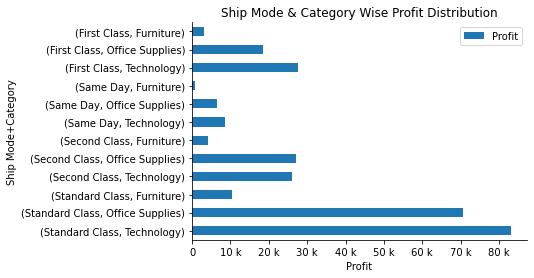

In [111]:
ax = df_ship_cat_pro_pivot.plot(
...     kind='barh', stacked=True,
...     title='Ship Mode & Category Wise Profit Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Profit', ylabel='Ship Mode+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### C. Ship Mode wise Category Discount Distribution 

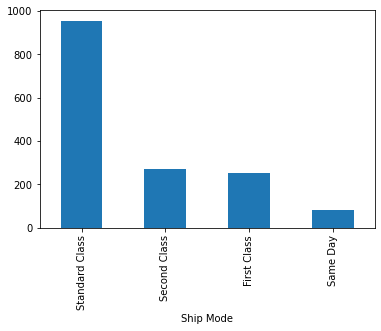

In [112]:
retail_data.groupby('Ship Mode').Discount.sum().sort_values(ascending=False)[:].plot.bar()

In [113]:
df_ship_cat_dsc_pivot = pd.pivot_table(retail_data,['Discount'],['Ship Mode','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_ship_cat_dsc_pivot.reindex(df_ship_cat_dsc_pivot.sort_index().index)
df_ship_cat_dsc_pivot

Discount
Ship Mode      Category                 
First Class    Furniture           58.87
               Office Supplies    154.00
               Technology          40.30
Same Day       Furniture           22.15
               Office Supplies     46.80
               Technology          13.80
Second Class   Furniture           73.65
               Office Supplies    148.80
               Technology          47.70
Standard Class Furniture          214.22
               Office Supplies    598.20
               Technology         142.60

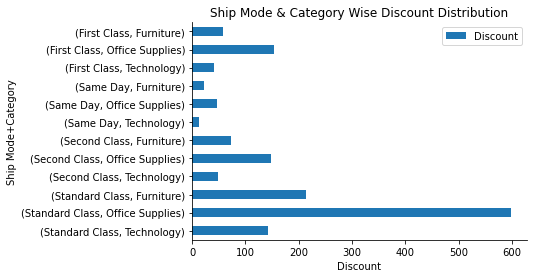

In [114]:
ax = df_ship_cat_dsc_pivot.plot(
...     kind='barh', stacked=True,
...     title='Ship Mode & Category Wise Discount Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Discount', ylabel='Ship Mode+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### D.Ship Mode wise Category Quantity Distribution 


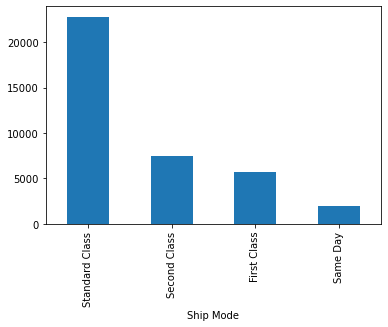

In [115]:
retail_data.groupby('Ship Mode').Quantity.sum().sort_values(ascending=False)[:20].plot.bar()

In [116]:
df_ship_cat_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['Ship Mode','Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_ship_cat_qty_pivot.reindex(df_ship_cat_qty_pivot.sort_index().index)
df_ship_cat_qty_pivot

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

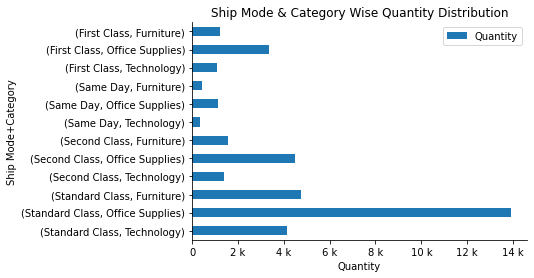

In [117]:
ax = df_ship_cat_qty_pivot.plot(
...     kind='barh', stacked=True,
...     title='Ship Mode & Category Wise Quantity Distribution'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Quantity', ylabel='Ship Mode+Category')
#>>> ax.legend(title='Prof')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### 23. City wise Shipping Mode Distribution
The table shows the top 10 cities with highest no. of shipment across multiple modes

In [118]:
df_city_shipmode=pd.crosstab(retail_data.City,retail_data['Ship Mode'], margins=True, margins_name='Total')
df_city_shipmode.reindex(df_city_shipmode['Total'].sort_values(ascending=False)[:10].index)

Ship Mode,First Class,Same Day,Second Class,Standard Class,Total
City,,,,,
Total,1538,543,1945,5968,9994
New York City,147,52,167,549,915
Los Angeles,111,28,159,449,747
Philadelphia,94,16,84,343,537
San Francisco,91,42,90,287,510
Seattle,60,37,82,249,428
Houston,53,16,88,220,377
Chicago,35,11,77,191,314
Columbus,27,23,36,136,222


### 24. Region wise Shipping Mode Distribution
The table shows the different shipment mode details across the 4 regions.

In [119]:
df_region_shipmode=pd.crosstab(retail_data.Region,retail_data['Ship Mode'], margins_name='Total', margins=True )
df_region_shipmode.reindex(df_region_shipmode['Total'].sort_values(ascending=False)[:10].index)

Ship Mode,First Class,Same Day,Second Class,Standard Class,Total
Region,,,,,
Total,1538,543,1945,5968,9994
West,515,185,621,1882,3203
East,490,155,530,1673,2848
Central,299,120,465,1439,2323
South,234,83,329,974,1620


* Standard Class is the choicest mode of shipment across all the 4 regions. 
* Same day shipments are comparatively least preferred across all the regions.

In [120]:
df_region_shipmode_pivot = pd.pivot_table(retail_data,['Sales'],['Region','Ship Mode'],aggfunc=np.sum)
df_region_shipmode_pivot.reindex(df_region_shipmode_pivot['Sales'].sort_values(ascending=False).index)
df_region_shipmode_pivot

Sales
Region  Ship Mode                  
Central First Class      58746.9154
        Same Day         20415.4100
        Second Class    103550.0054
        Standard Class  318527.5600
East    First Class     113587.0530
        Same Day         43326.8320
        Second Class    116545.5240
        Standard Class  405321.8310
South   First Class      49332.5660
        Same Day         21017.1730
        Second Class     93758.6125
        Standard Class  227613.5535
West    First Class     129761.8885
        Same Day         43603.7100
        Second Class    145339.4275
        Standard Class  406752.7985

### 25. Category & Subcategory wise  Distribution

In [121]:
df_category_subcat=pd.crosstab(retail_data['Sub-Category'],retail_data['Category'], margins=True, margins_name='Total')
df_category_subcat.reindex(df_category_subcat['Total'].sort_values(ascending=False)[:10].index)
df_category_subcat

Category,Furniture,Office Supplies,Technology,Total
Sub-Category,,,,
Accessories,0,0,775,775
Appliances,0,466,0,466
Art,0,796,0,796
Binders,0,1523,0,1523
Bookcases,228,0,0,228
Chairs,617,0,0,617
Copiers,0,0,68,68
Envelopes,0,254,0,254
Fasteners,0,217,0,217


The above table shows all the categories of the products and sub-categories under them:

* Furniture: Bookcases, Chairs, Furnishings, Tables
* Office Supplies: Appliances, Art, Binders, Envelopes, Fasteners, Labels, Paper, Storage, Supplies
* Technology: Accessories, Copiers, Machines, Phones
___________
Inference:

1. People have mostly purchased Office Supplies. Closely following are Furniture and technology.
2. Under office supplies, people have purchased mostly Binders, Paper, Stirage, Art, etc.
3. People have purchased mostly Furnishings & Chairs from Furniture Category.
4. In Technology category - people majorly purchased Phones and accessories than other products.

In [122]:
df_cat_subcat_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['Category','Sub-Category'], aggfunc=np.sum)
df_cat_subcat_qty_pivot.reindex(df_cat_subcat_qty_pivot['Quantity'].sort_values(ascending=False).index)
df_cat_subcat_qty_pivot

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

### 26. Region wise Shipments shipped through various shipment modes:

In [123]:
df_city_shipmode_sales_pivot2= pd.pivot_table(retail_data,'Quantity',index=['Region'], columns=['Ship Mode'], aggfunc=np.sum )
df_city_shipmode_sales_pivot2.reindex(df_city_shipmode_sales_pivot2.sort_index().index)

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,1156,392,1795,5437
East,1805,573,2026,6214
South,830,324,1294,3761
West,1902,671,2308,7385


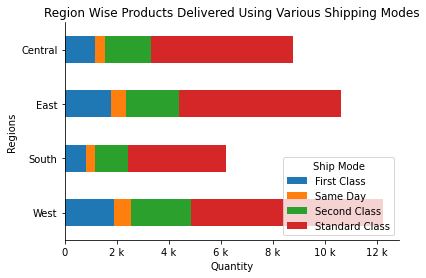

In [124]:
ax = df_city_shipmode_sales_pivot2.plot(
...     kind='barh', stacked=True,
...     title='Region Wise Products Delivered Using Various Shipping Modes'
... )
>>> ax.invert_yaxis() # put destinations with more passengers on top
# formatting
>>> ax.set(xlabel='Quantity', ylabel='Regions')
>>> ax.legend(title='Ship Mode')
# shows x-axis in millions instead of scientific notation
>>> ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
>>> for spine in ['top', 'right']:
...     ax.spines[spine].set_visible(False)

### 28. Region wise with Highest Sub-Category Sales

In [127]:
df_subcat_reg_pivot = pd.pivot_table(retail_data,['Sales'],['Region','Sub-Category'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_subcat_reg_pivot.reindex(df_subcat_reg_pivot['Sales'].sort_values(ascending=False).index)

,,Sales
Region,Sub-Category,
West,Chairs,101781.328
East,Phones,100614.982
West,Phones,98684.352
East,Chairs,96260.683
Central,Chairs,85230.646
...,...,...
South,Labels,2353.180
West,Fasteners,923.216
East,Fasteners,819.718


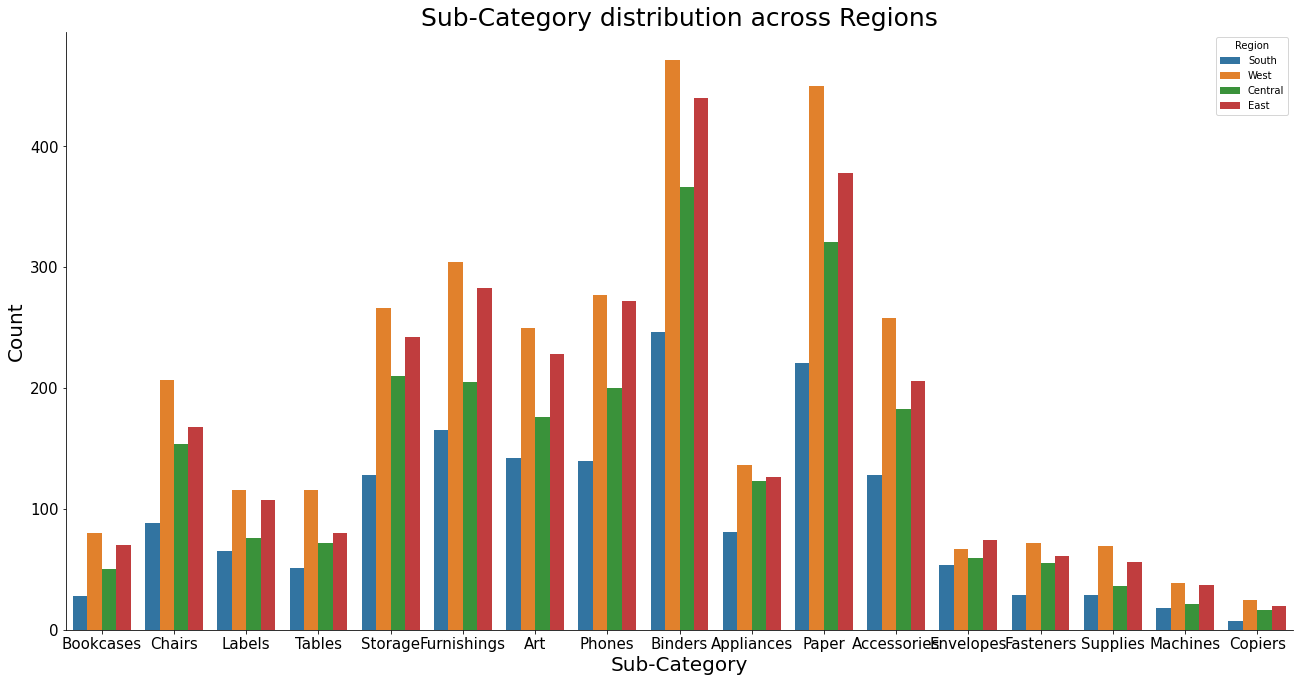

In [128]:
fig, ax1 = plt.subplots()
fig.set_size_inches(22,11)
sns.countplot(x='Sub-Category', data=retail_data, hue=retail_data['Region'])
ax1.set_xlabel('Sub-Category', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax1.set_title('Sub-Category distribution across Regions', fontsize=25)
ax1.tick_params(labelsize=15)
sns.despine()


In [129]:
df_subcat_reg_pivot.head(50)

Sales
Region  Sub-Category             
Central Accessories    33956.0760
        Appliances     23582.0330
        Art             5765.3400
        Binders        56923.2820
        Bookcases      24157.1768
        Chairs         85230.6460
        Copiers        37259.5700
        Envelopes       4636.8720
        Fasteners        778.0300
        Furnishings    15254.3700
        Labels          2451.4720
        Machines       26797.3840
        Paper          17491.9020
        Phones         72403.2820
        Storage        45930.1120
        Supplies        9467.3720
        Tables         39154.9710
East    Accessories    45033.3720
        Appliances     34188.4660
        Art             7485.7640
        Binders        53497.9970
        Bookcases      43819.3340
        Chairs         96260.6830
        Copiers        53219.4620
        Envelopes       4375.8740
        Fasteners        819.7180
        Furnishings    29071.3800
        Labels          2602.9340
        Machines       66106.1650
        Paper          20172.6020
        Phones        100614.9820
        Storage        71612.5840
        Supplies       10760.1160
        Tables         39139.8070
South   Accessories    27276.7540
        Appliances     19525.3260
        Art             4655.6220
        Binders        37030.3410
        Bookcases      10899.3620
        Chairs         45176.4460
        Copiers         9299.7560
        Envelopes       3345.5560
        Fasteners        503.3160
        Furnishings    17306.6840
        Labels          2353.1800
        Machines       53890.9600
        Paper          14150.9840
        Phones         58304.4380
        Storage        35768.0600
        Supplies        8318.9280

In [130]:
df_subcat_reg_pivot.tail(20)

Sales
Region Sub-Category             
South  Storage        35768.0600
       Supplies        8318.9280
       Tables         43916.1920
West   Accessories    61114.1160
       Appliances     30236.3360
       Art             9212.0660
       Binders        55961.1130
       Bookcases      36004.1235
       Chairs        101781.3280
       Copiers        49749.2420
       Envelopes       4118.1000
       Fasteners        923.2160
       Furnishings    30072.7300
       Labels          5078.7260
       Machines       42444.1220
       Paper          26663.7180
       Phones         98684.3520
       Storage        70532.8520
       Supplies       18127.1220
       Tables         84754.5620

States with maximum sales & their regions:

* Central: Texas (170188.0458), Illinois(80166.1010), Michigan (76269.6140) have highest sales in this region
* East: New Your (310876.2710) & Pennsylvania (116511.9140) have highest sales in this region
* South: Florida (89473.7080) & Virginia(70636.72) have highest sales in this region
* West: California(457687.6315) & Washington(138641.27) have highest sales in this region

### 29. Region & State Wise Profit Distribution

In [131]:
df_cat_state_pro_pivot = pd.pivot_table(retail_data,['Profit'],['Region','State'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_state_pro_pivot.reindex(df_cat_state_pro_pivot['Profit'].sort_values(ascending=False).index)
df_cat_state_pro_pivot

Profit
Region  State                           
Central Illinois             -12607.8870
        Indiana               18382.9363
        Iowa                   1183.8119
        Kansas                  836.4435
        Michigan              24463.1876
        Minnesota             10823.1874
        Missouri               6436.2105
        Nebraska               2037.0942
        North Dakota            230.1497
        Oklahoma               4853.9560
        South Dakota            394.8283
        Texas                -25729.3563
        Wisconsin              8401.8004
East    Connecticut            3511.4918
        Delaware               9977.3748
        District of Columbia   1059.5893
        Maine                   454.4862
        Maryland               7031.1788
        Massachusetts          6785.5016
        New Hampshire          1706.5028
        New Jersey             9772.9138
        New York              74038.5486
        Ohio                 -16971.3766
        Pennsylvania         -15559.9603
        Rhode Island           7285.6293
        Vermont                2244.9783
        West Virginia           185.9216
South   Alabama                5786.8253
        Arkansas               4008.6871
        Florida               -3399.3017
        Georgia               16250.0433
        Kentucky              11199.6966
        Louisiana              2196.1023
        Mississippi            3172.9762
        North Carolina        -7490.9122
        South Carolina         1769.0566
        Tennessee             -5341.6936
        Virginia              18597.9504
West    Arizona               -3427.9246
        California            76381.3871
        Colorado              -6527.8579
        Idaho                   826.7231
        Montana                1833.3285
        Nevada                 3316.7659
        New Mexico             1157.1161
        Oregon                -1190.4705
        Utah                   2546.5335
        Washington            33402.6517
        Wyoming                 100.1960

States with maximum profits/losses & their regions:

* Central: Michigan (24463.1876) and Indiana (18382.9363) have highest profits in this region. Texas (-25729.3563) & Illinois(-12607.8870) have incurred huge losses irrespective of higher sales.

* East: New York(74038.5486) have highest profits in this region. Ohio (-16971.3766) & Pennsylvania(-15559.9603) have incurred huge losses. Lowest profits: West Virginia (185.9216)

* South: Virginia(18597.9504), Georgia(16250.0433) & Kentucky(11199.6966) have highest profits in this region. Florida (3399.3017), North Carolina(-7490.9122) & Tennessee(-5341.6936) have incurred max. losses. Lowest Profit: South Carolina(1769.0566)

* West: California(76381.3871) & Washington(33402.6517) have highest profits in this region. Arizona(3427.9246), Colorado(6527.8579), Oregon (1190.4705) have incurred losses. Lowest profits at Wyoming(100.1960)
        

### 30. City - Shipment Mode Based Sales Summary

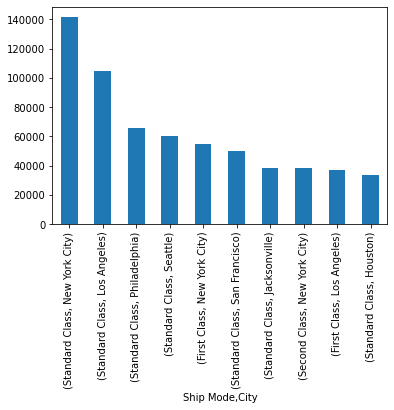

In [132]:
retail_data.groupby(['Ship Mode','City']).Sales.sum().sort_values(ascending=False)[:10].plot.bar()

### 31. A. City - Category Based Sales Summary (Top 10):

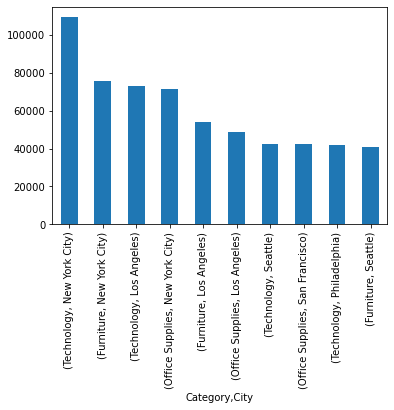

In [133]:
retail_data.groupby(['Category','City']).Sales.sum().sort_values(ascending=False)[:10].plot.bar()

### B. City - Category Based Sales Summary (Last 10):

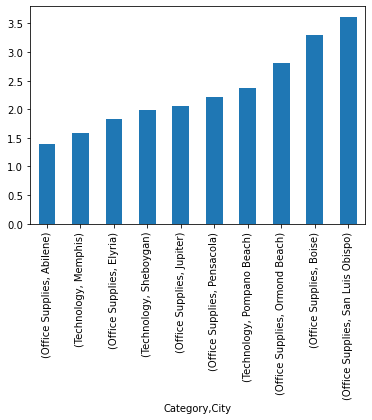

In [134]:
retail_data.groupby(['Category','City']).Sales.sum().sort_values(ascending=True)[:10].plot.bar()

### C. City - Category Based Profit Summary (Top 10):

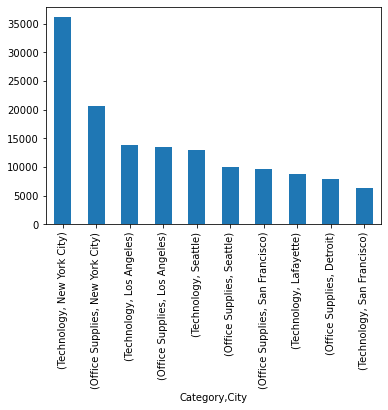

In [135]:
retail_data.groupby(['Category','City']).Profit.sum().sort_values(ascending=False)[:10].plot.bar()

### D. City - Category Based Profit/Loss Summary (Last 10):

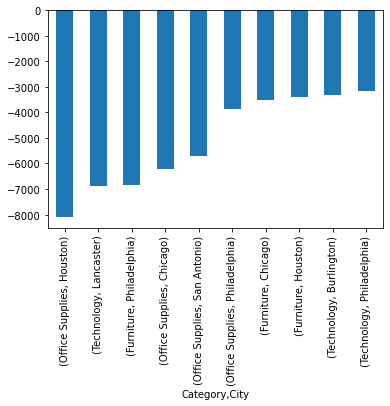

In [136]:
retail_data.groupby(['Category','City']).Profit.sum().sort_values(ascending=True)[:10].plot.bar()

### E. City - Category Based Quantity Purchased/Ordered Summary (Top 10):

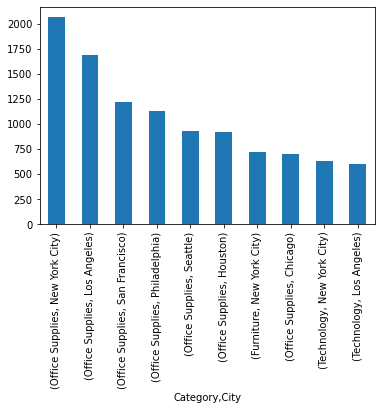

In [137]:
retail_data.groupby(['Category','City']).Quantity.sum().sort_values(ascending=False)[:10].plot.bar()

### F. City - Category Based Quantity Purchased/Ordered Summary (Last 10):

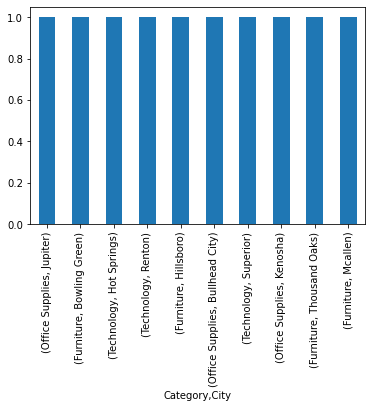

In [138]:
retail_data.groupby(['Category','City']).Quantity.sum().sort_values(ascending=True)[:10].plot.bar()

### ANALYSIS:

1. The most preferred Ship mode is Standard Class having Maximum Sales & Maximum Profit.Its in the First Class Ship Mode, we can find orders having maximum profit than sales. We must find which Category's sub-categories are getting shipped and to which region, by which segment of customers.

2. Inspite of getting majority of the orders from Consumer segment and with highest sales and profit amongst all, Corporate and Home Office segments are earning more profits than sales We must look into the Categories, Sub-Categories beig ordered and shipped to which State and Region.

3. Customers from West and East regions are placing more orders as compared to other regions. They are the regions earning more profits than sales, inspite of their sales being highest amongst all. We must find Category & Sub categories ordered from these regions. Central & South Regions are getting lesser sales and earning lesser profits.

4. Categories like Office Supplies and Technology are earning major profits than sales. Furniture Category is earning lesser profits. Again, which are these subcategories leading the resulting sales and profits.


#### The Data has:

1.Category- Subcategory Relation:
* Furniture: Bookcases, Chairs, Furnishings, Tables
* Office Supplies: Appliances, Art, Binders, Envelopes, Fasteners, Labels, Paper, Storage, Supplies
* Technology: Accessories, Copiers, Machines, Phones

Major selling sub-categories are:
* Furniture: Furnishings, Chairs
* Office Supplies: Binders, Papers, Storage, Art
* Technology: Phones, Accessories

Max. profit earned from Region: West
* In Central region only, in the furniture category, we can see some losses incurred.
* In cental region, Max. profit was seen in Technology category
* In East region, Max. profit was seen in Technology category and Office Supplies category.
* In South region as well, we can see major profits gained in Office Supplies & Technology category.
* In west region, We can see max profit was gained in Technology category and Office supplies categories.


Profit/Loss across categories and subcategory:
* Tables and Bookcases under Furniture category incurred losses.
* Supplies under Office Supplies incurred losses.


States with maximum sales & their regions:

* Central: Texas (170188.0458), Illinois(80166.1010), Michigan (76269.6140) have highest sales in this region
* East: New Your (310876.2710) & Pennsylvania (116511.9140) have highest sales in this region
* South: Florida (89473.7080) & Virginia(70636.72) have highest sales in this region
* West: California(457687.6315) & Washington(138641.27) have highest sales in this region

Region & States with maximum profits/losses & their regions:

* Central: Michigan (24463.1876) and Indiana (18382.9363) have highest profits in this region. Texas (-25729.3563) & Illinois(-12607.8870) have incurred huge losses irrespective of higher sales.
* East: New York(74038.5486) have highest profits in this region. Ohio (-16971.3766) & Pennsylvania(-15559.9603) have incurred huge losses. Lowest profits: West Virginia (185.9216)
* South: Virginia(18597.9504), Georgia(16250.0433) & Kentucky(11199.6966) have highest profits in this region. Florida (3399.3017), North Carolina(-7490.9122) & Tennessee(-5341.6936) have incurred max. losses. Lowest Profit: South Carolina(1769.0566)
* West: California(76381.3871) & Washington(33402.6517) have highest profits in this region. Arizona(3427.9246), Colorado(6527.8579), Oregon (1190.4705) have incurred losses. Lowest profits at Wyoming(100.1960)


#### We can infer that:


From the data, we can derive that:
   Category has:
   Profit(Technology) > Profit(Supplies) > Profit(Furniture) => Simply because => 
   Sales(Technology) > Sales(Supplies) > Sales(Furniture) : Ship Mode

**** Category Office Supplies: They are ordered more and we can see huge discounts being given across all the regions, which are impacting the profits especially in regions like Central, East. 

**** Furniture Category we can see, high sales (Office supplies are ordered more from all the regions) but low profits. West and East are earning huge profits due to more sales and lesser discounts offered in this section of category.

**** Under Furniture Category: All the subcategories (Boo Cases, Chairs, Furnishings) are earning lesser profits, inspite of higher sales. Also as compared to other categories, it is the least performing category amongst all and across all the 4 regions.

**** Technology: Phones, Copiers, Accessories are giving better profits, especially copiers and accessories we can infer they are getting more profits than other subcategories in this category. 

**** Under Office Supplies, except for papers and binders, every other subcategory are yielding lesser profits, or they are not being ordered/ less ordered, at all by the customers. However, we can see that its the Binder Sub- category on which maximum discounts are being offered. Therefore overall, subcategories: Copiers, Phones, Accessories, Paper, Binders, Chairs and storage are yielding profits. Bookcases, Supplies and Tables are yielding losses.


Thank You